# Time Series Forecast

## Intro

- **SARIMAX** : Seasonal AutoRegresive Integrated Moving Averages with eXogenous regresors

## Import libraries

In [2]:
import pandas as pd
import numpy as np

import statsmodels.api as sm

from datetime import datetime
from matplotlib import pyplot
    
import dsutils as du
    
import warnings
warnings.filterwarnings('ignore')


def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
 

## Load data

In [3]:
shampoo_sales = pd.read_csv("../data/shampoo.csv", 
                            header=0, 
                            parse_dates=[0], 
                            squeeze=True, 
                            date_parser=parser)

shampoo_sales.head()

,Month,Sales
0,1901-01-01,266.0
1,1901-02-01,145.9
2,1901-03-01,183.1
3,1901-04-01,119.3
4,1901-05-01,180.3


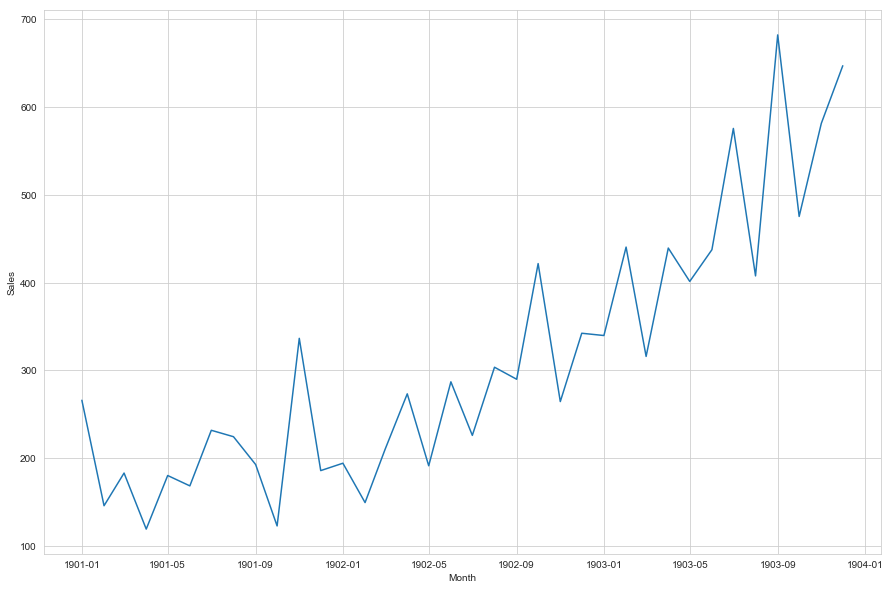

In [4]:
shampoo_sales['Month'] = pd.to_datetime(shampoo_sales['Month'])

du.show_lineplot(shampoo_sales, xvalue='Month', yvalue='Sales')

## Autocorrelacion plot

This plot shows the correlation of data with previous data, taking account many lags. Lags are de period of time that we are taking into account to measure the correlation. Autocorrelation score is comprised between 1 and -1 being 0 no correlation. A autocorrelation close to 1 imply a high postivie corrrelation, and close to -1 a negative correlation. In this case, we see the there are high values of correlation for lags lower than 5. Correlation goes down with lags higher than 5.

This analysis is useful to know better how our series is correlated with older values, and is important to identify the optimum lag.

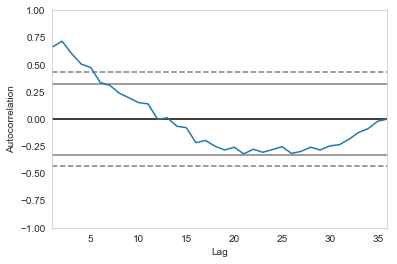

In [8]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(shampoo_sales.loc[:,'Sales'])

## Decompose time series

https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

> Components:
> 
> - Systematic: Components of the time series that have consistency or recurrence and can be described and modeled.
> - Non-Systematic: Components of the time series that cannot be directly modeled.
> 
> A given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.
> 
> These components are defined as follows:
> 
> - Level: The average value in the series.
> - Trend: The increasing or decreasing value in the series.
> - Seasonality: The repeating short-term cycle in the series.
> - Noise: The random variation in the series.

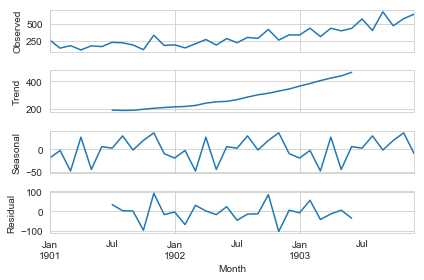

In [13]:
shampoo_sales = shampoo_sales.set_index('Month')
decomposition = sm.tsa.seasonal_decompose(shampoo_sales, model='additive')
fig = decomposition.plot()

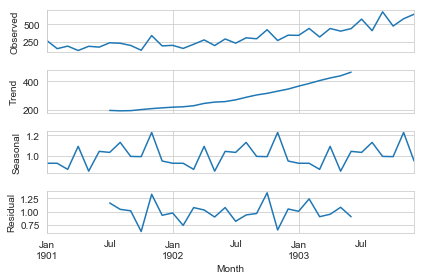

In [15]:
#shampoo_sales = shampoo_sales.set_index('Month')
decomposition = sm.tsa.seasonal_decompose(shampoo_sales, model='multiplicative')
fig = decomposition.plot()

In [24]:
df_seasonal = pd.DataFrame(decomposition.seasonal)
df_observed = pd.DataFrame(decomposition.observed)
df_trend = pd.DataFrame(decomposition.trend)
df_residual = pd.DataFrame(decomposition.resid)

In [17]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1364: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1367: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Wed, 01 May 2019   AIC                            406.340
Time:                        13:46:11   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


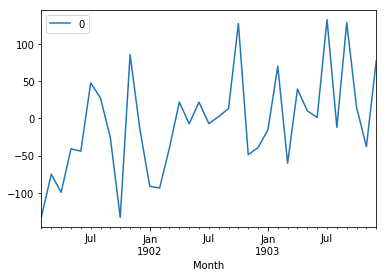

In [19]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

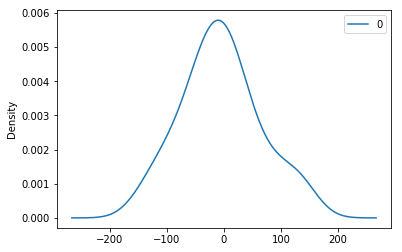

In [20]:
residuals.plot(kind='kde')